In [116]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests, time
from config import weather_api_key
from datetime import datetime
import sys
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [38]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [39]:
# Create a list for holding the cities.
cities = []

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

635

In [94]:
# Initiate a dictionary of cities not found and error code
cities_not_located = {}

# Initiate list for city data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
#         if set_count ==2:
#             break
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,          
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        err = sys.exc_info()[0]
        cities_not_located[i]=({"City":city,"Error Code":err})
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | guhagar
Processing Record 6 of Set 1 | amapa
Processing Record 7 of Set 1 | negombo
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | pacific grove
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | el alto
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | richards bay
Processing Record 16 of Set 1 | padang
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | langres
Processing Record 20 of Set 1 | port moresby
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Se

Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | old road
City not found. Skipping...
Processing Record 41 of Set 4 | aykhal
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | crib point
Processing Record 45 of Set 4 | bubaque
Processing Record 46 of Set 4 | kaohsiung
Processing Record 47 of Set 4 | boyolangu
Processing Record 48 of Set 4 | fare
Processing Record 49 of Set 4 | bhum
Processing Record 50 of Set 4 | san juan
Processing Record 1 of Set 5 | anadyr
Processing Record 2 of Set 5 | xuanhua
Processing Record 3 of Set 5 | taitung
Processing Record 4 of Set 5 | saurimo
Processing Record 5 of Set 5 | santo tomas
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | ipilan
Processing Record 8 of Set 5 | waipawa
Processing Record 9 of Set 5 | coquimbo
Processing Record 10 of Set 5 | siuna
Processing Record 11 of Set 5 | hit
Processing Record 12 of Set 5 |

Processing Record 32 of Set 8 | tocopilla
Processing Record 33 of Set 8 | mareeba
Processing Record 34 of Set 8 | bafq
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | ankang
Processing Record 37 of Set 8 | parainen
Processing Record 38 of Set 8 | suciu de sus
Processing Record 39 of Set 8 | goure
Processing Record 40 of Set 8 | tamiahua
Processing Record 41 of Set 8 | riyadh
Processing Record 42 of Set 8 | tenenkou
Processing Record 43 of Set 8 | tabou
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | havre-saint-pierre
Processing Record 46 of Set 8 | verkhnyaya inta
Processing Record 47 of Set 8 | tigil
Processing Record 48 of Set 8 | hwange
Processing Record 49 of Set 8 | sagna
Processing Record 50 of Set 8 | balvanesti
Processing Record 1 of Set 9 | san-pedro
Processing Record 2 of Set 9 | villamontes
Processing Record 3 of Set 9 | samusu
City not found. Skipping...
Processing Record 4 of Set 9 | dukat
Pro

Processing Record 14 of Set 12 | broome
Processing Record 15 of Set 12 | tanout
Processing Record 16 of Set 12 | valle de allende
Processing Record 17 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 12 | padilla
Processing Record 19 of Set 12 | santo domingo
Processing Record 20 of Set 12 | itaqui
Processing Record 21 of Set 12 | vao
Processing Record 22 of Set 12 | rudbar
Processing Record 23 of Set 12 | paamiut
Processing Record 24 of Set 12 | flin flon
Processing Record 25 of Set 12 | vuktyl
Processing Record 26 of Set 12 | ekhabi
Processing Record 27 of Set 12 | ziro
Processing Record 28 of Set 12 | haibowan
City not found. Skipping...
Processing Record 29 of Set 12 | palu
Processing Record 30 of Set 12 | aranos
Processing Record 31 of Set 12 | santa rosa
Processing Record 32 of Set 12 | yatou
Processing Record 33 of Set 12 | halalo
City not found. Skipping...
Processing Record 34 of Set 12 | sofiysk
City not found. Skipping...
Processing Record 35 of S

{12: {'City': 'barentsburg', 'Error Code': KeyError},
 16: {'City': 'taolanaro', 'Error Code': KeyError},
 28: {'City': 'burica', 'Error Code': KeyError},
 52: {'City': 'belushya guba', 'Error Code': KeyError},
 79: {'City': 'sentyabrskiy', 'Error Code': KeyError},
 83: {'City': 'attawapiskat', 'Error Code': KeyError},
 99: {'City': 'viligili', 'Error Code': KeyError},
 100: {'City': 'umzimvubu', 'Error Code': KeyError},
 116: {'City': 'illoqqortoormiut', 'Error Code': KeyError},
 128: {'City': 'mentok', 'Error Code': KeyError},
 148: {'City': 'kuche', 'Error Code': KeyError},
 159: {'City': 'kracheh', 'Error Code': KeyError},
 166: {'City': 'grand river south east', 'Error Code': KeyError},
 175: {'City': 'vaitupu', 'Error Code': KeyError},
 185: {'City': 'zhanatas', 'Error Code': KeyError},
 189: {'City': 'old road', 'Error Code': KeyError},
 191: {'City': 'amderma', 'Error Code': KeyError},
 212: {'City': 'kazalinsk', 'Error Code': KeyError},
 222: {'City': 'marcona', 'Error Code': 

In [96]:

# Check how many error there were when trying to pull the weather data.
print(len(city_data))
print(len(cities_not_located))

578
57


In [100]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df_new = city_data_df[new_column_order]

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [108]:
# Extract relevant fields from the DataFrame for plotting.
lngs = city_data_df["Lng"]
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Get today's date in seconds.
today = time.strftime("%x")

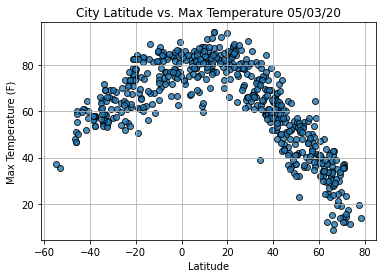

In [105]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

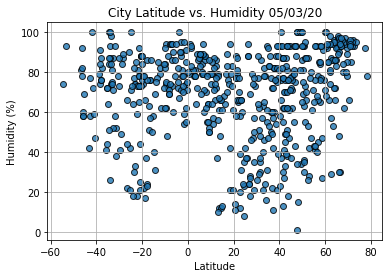

In [112]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

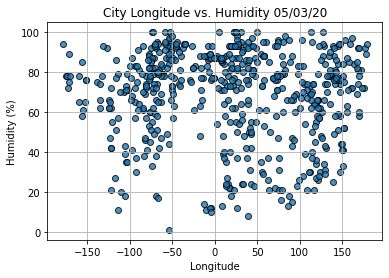

In [113]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lngs,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Longitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Longitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2a.png")
# Show plot.
plt.show()

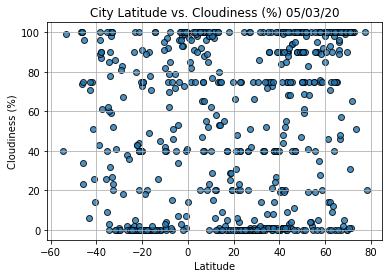

In [114]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

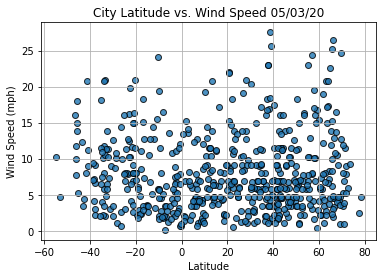

In [115]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [121]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

y = -0.3x + 68.47
The p-value is: 0.000
The r-value is: -0.541


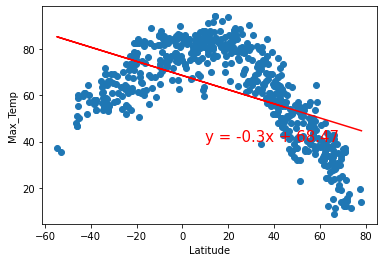

In [123]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
plt.show()